In [370]:
import numpy as np
import pickle
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import sys
sys.path.append("../module/")
from lipinski import *

In [196]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors, rdMolDescriptors, AllChem, QED
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#We suppres stdout from invalid smiles and validations
from rdkit import rdBase
rdBase.DisableLog ( 'rdApp.*')

In [197]:
k777 = "CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C/S(=O)(=O)c2ccccc2)CCc2ccccc2)CC1"
odn = "CC(C)(F)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc2)cc1)C(F)(F)F)C(=O)NC1(C#N)CC1"

In [198]:
descri_k777 = df.query("canonical_smiles in @k777").drop(["chembl_id", "molecular_species", "canonical_smiles", "mw_monoisotopic", 'cx_most_apka','cx_most_bpka','cx_logp','cx_logd','full_mwt'], axis=1).to_dict(orient='records').pop()
descri_odn = df.query("canonical_smiles in @odn").drop(["chembl_id", "molecular_species", "canonical_smiles", "mw_monoisotopic", 'cx_most_apka','cx_most_bpka','cx_logp','cx_logd','full_mwt'], axis=1).to_dict(orient='records').pop()

In [199]:
descri_k777

{'mw_freebase': 574.747,
 'alogp': 3.6599,
 'psa': 98.82,
 'rtb': 11.0,
 'aromatic_rings': 4.0,
 'heavy_atoms': 41.0,
 'qed_weighted': 0.36,
 'hba_lipinski': 5.0,
 'hbd_lipinski': 2.0,
 'num_lipinski_ro5_violations': 1.0}

In [69]:
descri_odn

{'mw_freebase': 525.568,
 'alogp': 4.6293,
 'psa': 99.06,
 'rtb': 9.0,
 'aromatic_rings': 3.0,
 'heavy_atoms': 36.0,
 'qed_weighted': 0.47,
 'hba_lipinski': 5.0,
 'hbd_lipinski': 2.0,
 'num_lipinski_ro5_violations': 1.0}

In [5]:
con = sqlite3.connect("../data/propriedades.db")

In [233]:
df = pd.read_sql("select * from dados", con)

In [ ]:
df_temp=df.drop(["chembl_id", "molecular_species", "canonical_smiles", "mw_monoisotopic", 'cx_most_apka','cx_most_bpka','cx_logp','cx_logd','full_mwt'], axis=1)

In [219]:
df_cru = pd.read_csv("data/data_cruzain.csv", ";")
df_cru

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL941,IMATINIB,4,493.62,0,4.59,imatinib,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,IC50,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL1155470,1,Scientific Literature,J. Med. Chem.,2010.00000,None,NaN
1,CHEMBL568312,NaN,0,286.31,0,2.24,24,[O-][n+]1onc2ccc(/C=C/[S+]([O-])c3ccccc3)cc21,Inhibition,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL1156117,1,Scientific Literature,Eur. J. Med. Chem.,2009.00000,None,NaN
2,CHEMBL352896,NaN,0,561.70,1,3.69,10d,CC(=O)NCCSCC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](Cc...,Ki,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL1135707,1,Scientific Literature,J. Med. Chem.,2002.00000,None,NaN
3,CHEMBL4249696,NaN,0,487.60,0,2.25,FGA77,CCOC(=O)/C=C/C(=O)[C@H](CCc1ccccc1)NC(=O)[C@H]...,K,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL4229471,1,Scientific Literature,Bioorg Med Chem,2018.00000,None,NaN
4,CHEMBL4247707,NaN,0,521.61,1,2.45,FGA74,CCOC(=O)/C=C/C(=O)[C@@H](CCc1ccccc1)NC(=O)[C@H...,IC50,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL4229471,1,Scientific Literature,Bioorg Med Chem,2018.00000,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32670,CHEMBL3329515,NaN,0,308.41,0,4.35,16,C/C(=N\Nc1nc(-c2ccc(C)cc2)cs1)c1ccccn1,Inhibition,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL3352772,1,Scientific Literature,Eur. J. Med. Chem.,2014.00000,None,NaN
32671,CHEMBL3114105,NaN,0,328.83,0,4.69,21,C/C(=N/Nc1nc(-c2ccc(Cl)cc2)cs1)c1ccccn1,IC50,NaN,...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL3352772,1,Scientific Literature,Eur. J. Med. Chem.,2014.00000,None,NaN
32672,CHEMBL4283566,NaN,0,627.78,1,4.36,3d,CC(C)C[C@H](NC(=O)OC(C)(C)C)C(=O)N1CCC[C@@H]1C...,Inhibition,'>',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL4270566,1,Scientific Literature,Eur J Med Chem,2018.00000,None,NaN
32673,CHEMBL4465398,NaN,0,394.35,1,6.31,24,Clc1ccc(-c2csc(N/N=C/CSc3ccccc3)n2)cc1Cl,Inhibition,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL4364307,1,Scientific Literature,Eur J Med Chem,2019.00000,None,NaN


In [380]:
df_ini_cru = pd.read_csv("data/cruzain_id_chemb.csv", ";")
df_ini_cru

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL568312,NaN,0,286.31000,0,2.24,24,[O-][n+]1onc2ccc(/C=C/[S+]([O-])c3ccccc3)cc21,Inhibition,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL1156117,1,Scientific Literature,Eur. J. Med. Chem.,2009,None,NaN
1,CHEMBL3347276,NaN,0,425.51000,0,0.98,35,C=CCNC(=S)N/N=C\c1ccccc1OCc1ccc2c(c1)=[N+]([O-...,Inhibition,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL3390845,1,Scientific Literature,MedChemComm,2010,None,NaN
2,CHEMBL3347366,NaN,0,368.40000,0,-0.19,33,CC1(C)[N+]([O-])=c2ccc(COc3ccccc3/C=N\NC(=N)N)...,Inhibition,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL3390845,1,Scientific Literature,MedChemComm,2010,None,NaN
3,CHEMBL3347331,NaN,0,369.38000,0,0.00,30,CC1(C)[N+]([O-])=c2ccc(COc3ccc(/C=N/NC(N)=O)cc...,Inhibition,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL3390845,1,Scientific Literature,MedChemComm,2010,None,NaN
4,CHEMBL3347321,NaN,0,461.55000,0,2.31,29,CC1(C)[N+]([O-])=c2ccc(COc3ccc(/C=N/NC(=S)Nc4c...,Inhibition,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL3390845,1,Scientific Literature,MedChemComm,2010,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,CHEMBL4434707,NaN,0,359.91000,1,5.65,22,Clc1ccc(-c2csc(N/N=C/CSc3ccccc3)n2)cc1,Inhibition,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL4364307,1,Scientific Literature,Eur J Med Chem,2019,None,NaN
711,CHEMBL3329515,NaN,0,308.41000,0,4.35,16,C/C(=N\Nc1nc(-c2ccc(C)cc2)cs1)c1ccccn1,Inhibition,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL3352772,1,Scientific Literature,Eur. J. Med. Chem.,2014,None,NaN
712,CHEMBL4283566,NaN,0,627.78000,1,4.36,3d,CC(C)C[C@H](NC(=O)OC(C)(C)C)C(=O)N1CCC[C@@H]1C...,Inhibition,'>',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL4270566,1,Scientific Literature,Eur J Med Chem,2018,None,NaN
713,CHEMBL4465398,NaN,0,394.35000,1,6.31,24,Clc1ccc(-c2csc(N/N=C/CSc3ccccc3)n2)cc1Cl,Inhibition,'=',...,Cruzipain,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL4364307,1,Scientific Literature,Eur J Med Chem,2019,None,NaN


In [381]:
df_ini_cru_drop = df.query("chembl_id in @df_ini_cru['Molecule ChEMBL ID']").drop(["chembl_id", "molecular_species", "canonical_smiles", "mw_monoisotopic", 'cx_most_apka','cx_most_bpka','cx_logp','cx_logd','full_mwt'], axis=1)
df_ini_cru_drop

,mw_freebase,alogp,psa,rtb,aromatic_rings,heavy_atoms,qed_weighted,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations
23639,322.43700,3.78190,42.54000,3.00000,3.00000,23.00000,0.53000,5.00000,0.00000,0.00000
24028,400.50700,4.93430,51.77000,5.00000,4.00000,29.00000,0.35000,6.00000,0.00000,0.00000
26038,309.84100,2.40160,40.29000,6.00000,3.00000,21.00000,0.81000,3.00000,2.00000,0.00000
82157,383.43300,2.02420,98.62000,7.00000,3.00000,27.00000,0.21000,6.00000,2.00000,0.00000
100110,178.23900,0.22840,32.26000,1.00000,2.00000,13.00000,0.62000,4.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...
2003987,322.43700,3.78190,42.54000,3.00000,3.00000,23.00000,0.53000,5.00000,0.00000,0.00000
2004376,400.50700,4.93430,51.77000,5.00000,4.00000,29.00000,0.35000,6.00000,0.00000,0.00000
2006386,309.84100,2.40160,40.29000,6.00000,3.00000,21.00000,0.81000,3.00000,2.00000,0.00000
2062505,383.43300,2.02420,98.62000,7.00000,3.00000,27.00000,0.21000,6.00000,2.00000,0.00000


In [220]:
df_cru_ids = df_cru["Molecule ChEMBL ID"]
df_cru_ids

0            CHEMBL941
1         CHEMBL568312
2         CHEMBL352896
3        CHEMBL4249696
4        CHEMBL4247707
             ...      
32670    CHEMBL3329515
32671    CHEMBL3114105
32672    CHEMBL4283566
32673    CHEMBL4465398
32674    CHEMBL4067684
Name: Molecule ChEMBL ID, Length: 32675, dtype: object

In [222]:
df_cru_of_prop = df.query("chembl_id in @df_cru['Molecule ChEMBL ID']").drop(["chembl_id", "molecular_species", "canonical_smiles", "mw_monoisotopic", 'cx_most_apka','cx_most_bpka','cx_logp','cx_logd','full_mwt'], axis=1)

In [79]:
from matplotlib import pyplot as plt

In [286]:
cols

['mw_freebase',
 'alogp',
 'psa',
 'rtb',
 'aromatic_rings',
 'heavy_atoms',
 'qed_weighted',
 'hba_lipinski',
 'hbd_lipinski',
 'num_lipinski_ro5_violations']

In [383]:
fig.savefig("imagens/histograma_odn_k777.png", format="png")

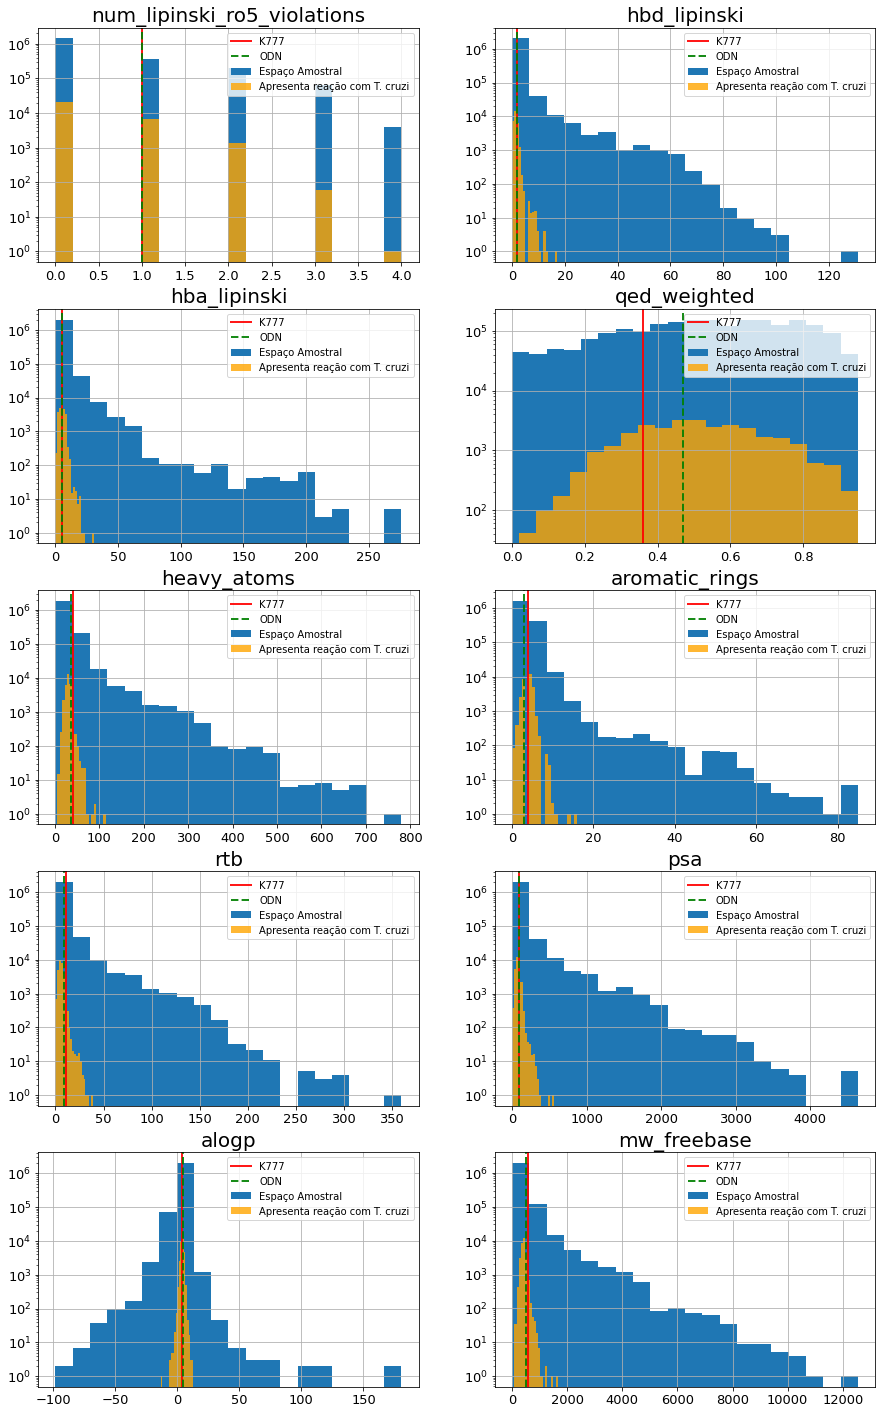

In [368]:
linhas = 5
colunas = 2
fig, axs = plt.subplots(linhas, colunas, figsize=(15,25))
cols = list(df_temp.columns)
#plt.suptitle("Localização do ODN e K777 no BD", fontsize=24, weight="bold")
for lin in range(linhas):
    for col in range(colunas):
        if (len(cols) > 0):
            col_atual = cols.pop()
            axs[lin, col].hist(df_temp[col_atual], bins=20, log=True, label="Espaço Amostral")
            axs[lin, col].hist(df_cru_of_prop[col_atual], bins=20, log=True, color="orange", label="Apresenta reação com T. cruzi", alpha=0.8)
            axs[lin, col].axvline(x=descri_k777[col_atual], color='r', linestyle='solid', linewidth=2, label="K777",alpha=0.9)
            axs[lin, col].axvline(x=descri_odn[col_atual], color='g', linestyle='dashed', linewidth=2, label="ODN",alpha=0.9) 
            axs[lin, col].legend(fontsize=10)
            axs[lin, col].set_title(col_atual, fontsize = 20)
            axs[lin, col].tick_params(axis='y', labelsize=13)
            axs[lin, col].tick_params(axis='x', labelsize=13)
            axs[lin, col].grid()
        else:
            axs[lin, col].axis('off')

plt.show()

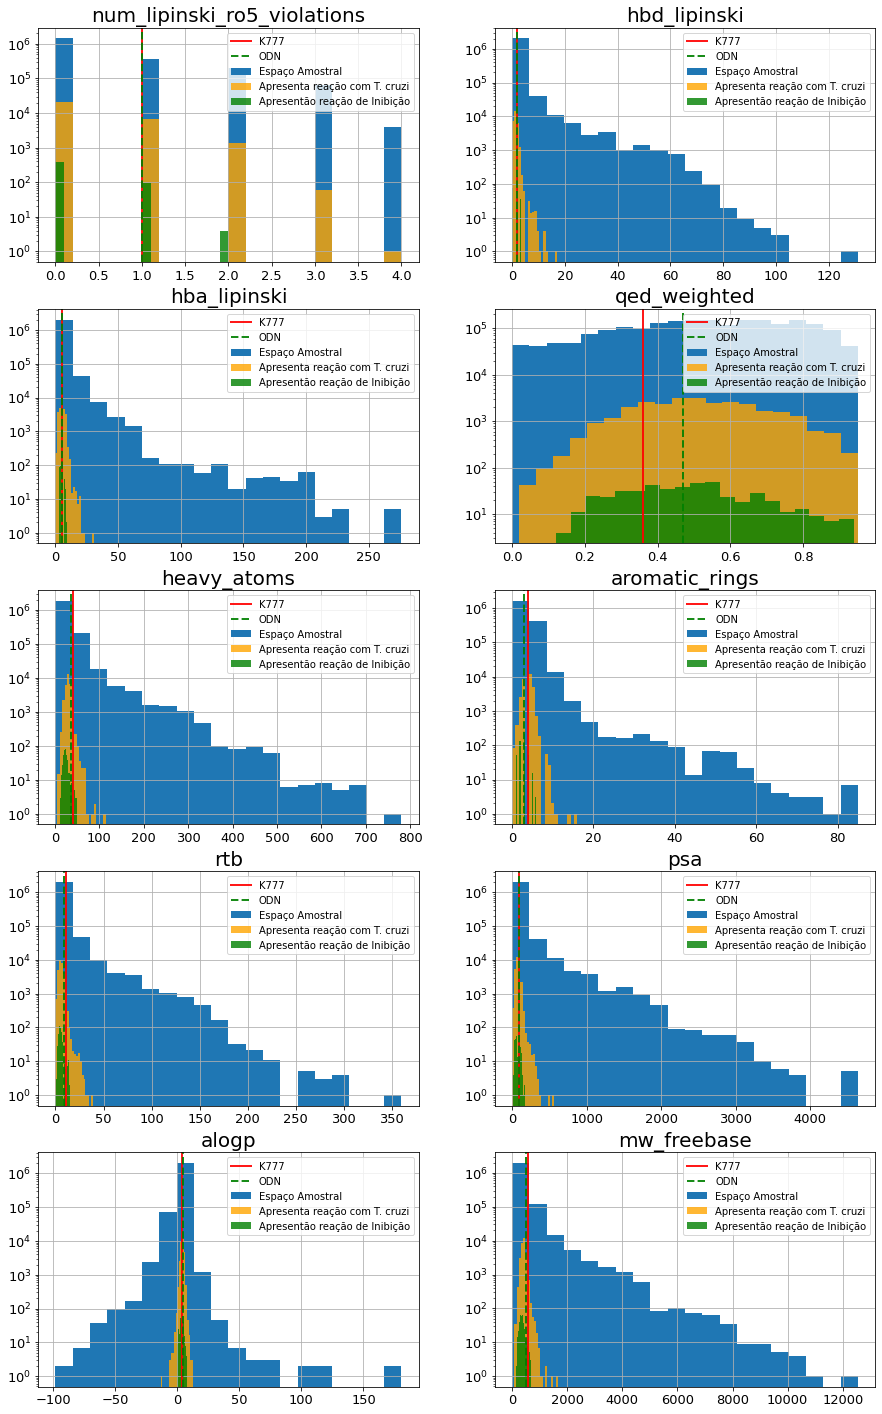

In [382]:
linhas = 5
colunas = 2
fig, axs = plt.subplots(linhas, colunas, figsize=(15,25))
cols = list(df_temp.columns)
#plt.suptitle("Localização do ODN e K777 no BD", fontsize=24, weight="bold")
for lin in range(linhas):
    for col in range(colunas):
        if (len(cols) > 0):
            col_atual = cols.pop()
            axs[lin, col].hist(df_temp[col_atual], bins=20, log=True, label="Espaço Amostral")
            axs[lin, col].hist(df_cru_of_prop[col_atual], bins=20, log=True, color="orange", label="Apresenta reação com T. cruzi", alpha=0.8)
            axs[lin, col].hist(df_ini_cru_drop[col_atual], bins=20, log=True, color="green", label="Apresentão reação de Inibição", alpha=0.8)
            axs[lin, col].axvline(x=descri_k777[col_atual], color='r', linestyle='solid', linewidth=2, label="K777",alpha=0.9)
            axs[lin, col].axvline(x=descri_odn[col_atual], color='g', linestyle='dashed', linewidth=2, label="ODN",alpha=0.9) 
            axs[lin, col].legend(fontsize=10)
            axs[lin, col].set_title(col_atual, fontsize = 20)
            axs[lin, col].tick_params(axis='y', labelsize=13)
            axs[lin, col].tick_params(axis='x', labelsize=13)
            axs[lin, col].grid()
        else:
            axs[lin, col].axis('off')

plt.show()

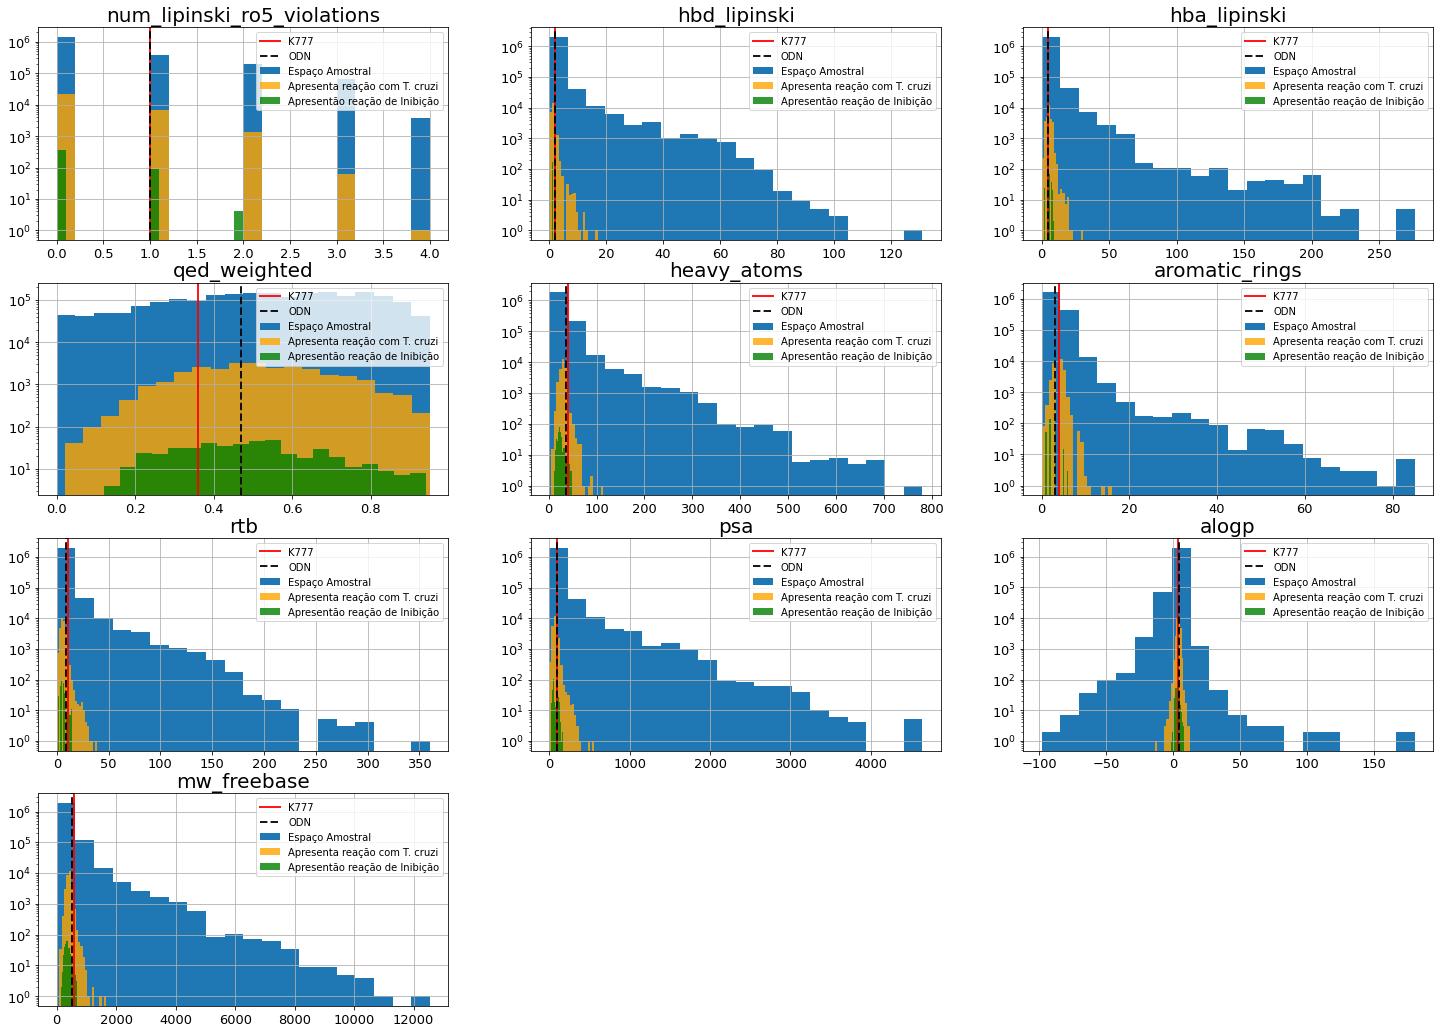

In [391]:
linhas = 4
colunas = 3
figg, axss = plt.subplots(linhas, colunas, figsize=(25,18))
cols = list(df_temp.columns)
#plt.suptitle("Localização do ODN e K777 no BD", fontsize=24, weight="bold")
for lin in range(linhas):
    for col in range(colunas):
        if (len(cols) > 0):
            col_atual = cols.pop()
            axss[lin, col].hist(df_temp[col_atual], bins=20, log=True, label="Espaço Amostral")
            axss[lin, col].hist(df_cru_of_prop[col_atual], bins=20, log=True, color="orange", label="Apresenta reação com T. cruzi", alpha=0.8)
            axss[lin, col].hist(df_ini_cru_drop[col_atual], bins=20, log=True, color="green", label="Apresentão reação de Inibição", alpha=0.8)
            axss[lin, col].axvline(x=descri_k777[col_atual], color='r', linestyle='solid', linewidth=2, label="K777",alpha=0.9)
            axss[lin, col].axvline(x=descri_odn[col_atual], color='black', linestyle='dashed', linewidth=2, label="ODN",alpha=0.9) 
            axss[lin, col].legend(fontsize=10)
            axss[lin, col].set_title(col_atual, fontsize = 20)
            axss[lin, col].tick_params(axis='y', labelsize=13)
            axss[lin, col].tick_params(axis='x', labelsize=13)
            axss[lin, col].grid()
        else:
            axss[lin, col].axis('off')

plt.show()

In [392]:
figg.savefig("imagens/histograma_odn_k777.png", format="png")

In [131]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [132]:
df_temp.describe()

,mw_freebase,alogp,psa,rtb,aromatic_rings,heavy_atoms,qed_weighted,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations
count,2084588.00,2084588.00,2084588.00,2084588.00,2084588.00,2084588.00,2084588.00,2084588.00,2084588.00,2084588.00
mean,435.53,3.33,94.45,6.57,3.57,30.54,0.53,5.71,2.00,0.48
std,263.54,2.44,108.48,8.05,1.68,18.40,0.23,4.58,3.70,0.81
min,4.00,-98.20,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,326.37,2.27,55.63,3.00,3.00,23.00,0.36,4.00,1.00,0.00
50%,395.47,3.43,77.05,5.00,3.00,28.00,0.55,5.00,1.00,0.00
75%,476.61,4.60,103.43,7.00,4.00,34.00,0.72,7.00,2.00,1.00
max,12546.32,180.52,4638.22,360.00,85.00,780.00,0.95,276.00,131.00,4.00


In [133]:
len(df_temp)

2084588